In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [6]:
df_no_na = df.dropna(axis=0)

In [7]:
df_no_na.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [8]:
df_no_na.shape
# perdidas cerca de 200 linhas

(4909, 12)

In [9]:
df_no_id = df_no_na.drop('id', axis=1)

In [10]:
df_no_id.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [11]:
df_no_id.shape

(4909, 11)

In [12]:
df_no_id.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [14]:
df2 = df_no_id[df_no_id['smoking_status']!="Unknown"]
# retiradas linhas com status unknown se fumou

In [15]:
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [16]:
df2.shape

(3426, 11)

In [17]:
df3 = df2[df2['gender']!="Other"]
# retirado Gender Other (1 linha)

In [18]:
df3.shape

(3425, 11)

In [19]:
df3.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [20]:
categorical_cols= ['gender','ever_married','work_type','Residence_type','smoking_status']

In [22]:
from sklearn.preprocessing import OrdinalEncoder

In [23]:
oe = OrdinalEncoder()
df3[categorical_cols] = oe.fit_transform(df3[categorical_cols])

C:\Users\rafae\AppData\Local\Temp\ipykernel_27480\2341905617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[categorical_cols] = oe.fit_transform(df3[categorical_cols])


In [24]:
X = df3[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]

In [25]:
y = df3['stroke']

In [26]:
X.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,0.0
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,1.0
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,2.0
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,1.0
5,1.0,81.0,0,0,1.0,2.0,1.0,186.21,29.0,0.0


In [27]:
y.head(5)

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

C:\Users\rafae\AppData\Local\Temp\ipykernel_27480\1823740327.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df3, x="stroke", palette=["#1f77b4", "#ff7f0e"], width=0.6)


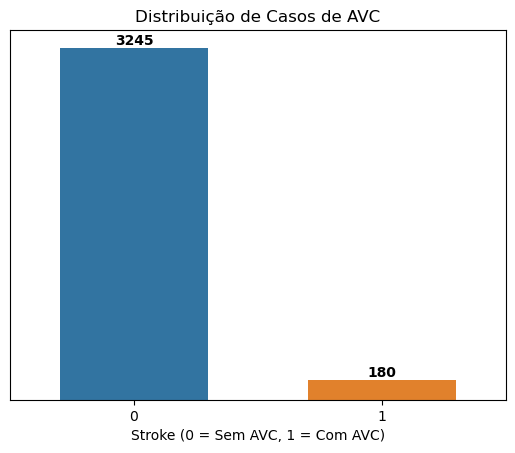

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(data=df3, x="stroke", palette=["#1f77b4", "#ff7f0e"], width=0.6)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, fontweight='bold')

ax.set_xlabel("Stroke (0 = Sem AVC, 1 = Com AVC)")
ax.set_ylabel("")
ax.set_title("Distribuição de Casos de AVC")
ax.set_yticks([])

plt.show()

In [35]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
clf = RandomForestClassifier(random_state = 0)

In [38]:
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [39]:
clf.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
accuracy = clf.score(x_test,y_test)*100

In [41]:
print('A accuracy do modelo é ',round(accuracy,2),'%')

A accuracy do modelo é  95.14 %


In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [44]:
y_pred = clf.predict(x_test)

In [45]:
cm = confusion_matrix(y_test,y_pred)

In [46]:
print(cm)

[[978   0]
 [ 50   0]]


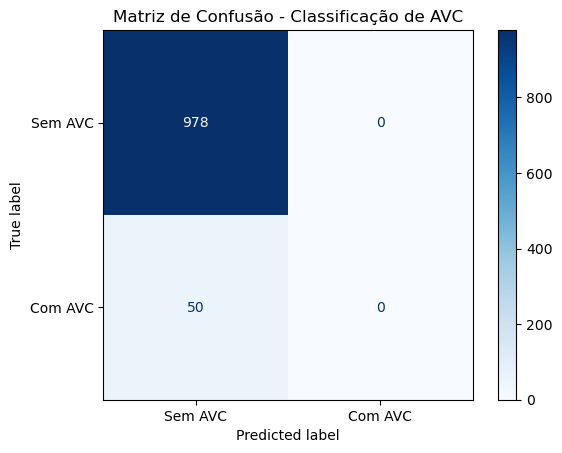

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sem AVC", "Com AVC"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Classificação de AVC")
plt.show()

# Vamos testar se resolvemos o problema de não prever bem AVCs com resampling

In [50]:
from sklearn.utils import resample

In [51]:
df3['stroke'].value_counts()

stroke
0    3245
1     180
Name: count, dtype: int64

In [52]:
df_major = df3[(df3['stroke']==0)]
df_minor = df3[(df3['stroke']==1)]
df_minor_resampled = resample(df_minor, replace=True, n_samples=3245, random_state = 0)
df_resampled = pd.concat([df_minor_resampled,df_major])

In [53]:
df_resampled.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
237,1.0,77.0,0,0,1.0,3.0,0.0,162.14,32.6,0.0,1
63,0.0,45.0,0,0,1.0,2.0,0.0,93.72,30.2,0.0,1
159,0.0,81.0,1,0,1.0,3.0,0.0,74.02,25.0,1.0,1
92,0.0,57.0,0,0,0.0,3.0,1.0,68.02,37.5,1.0,1
143,0.0,69.0,1,1,0.0,3.0,1.0,72.17,36.8,1.0,1


C:\Users\rafae\AppData\Local\Temp\ipykernel_27480\3826011443.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_resampled, x="stroke", palette=["#1f77b4", "#ff7f0e"], width=0.6)


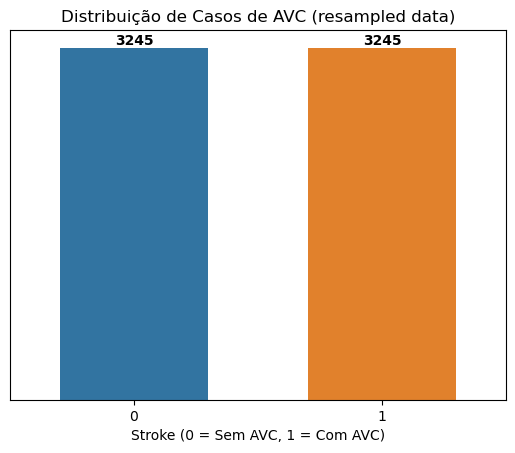

In [54]:
ax = sns.countplot(data=df_resampled, x="stroke", palette=["#1f77b4", "#ff7f0e"], width=0.6)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, fontweight='bold')

ax.set_xlabel("Stroke (0 = Sem AVC, 1 = Com AVC)")
ax.set_ylabel("")
ax.set_title("Distribuição de Casos de AVC (resampled data)")
ax.set_yticks([])

plt.show()


In [55]:
X = df_resampled[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
y = df_resampled['stroke']

In [56]:
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [57]:
clf = RandomForestClassifier(random_state = 0)

In [58]:
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [59]:
clf.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [60]:
accuracy = clf.score(x_test,y_test)*100

In [61]:
print('A accuracy do modelo é ',round(accuracy,2),'%')

A accuracy do modelo é  98.92 %


In [62]:
y_pred = clf.predict(x_test)

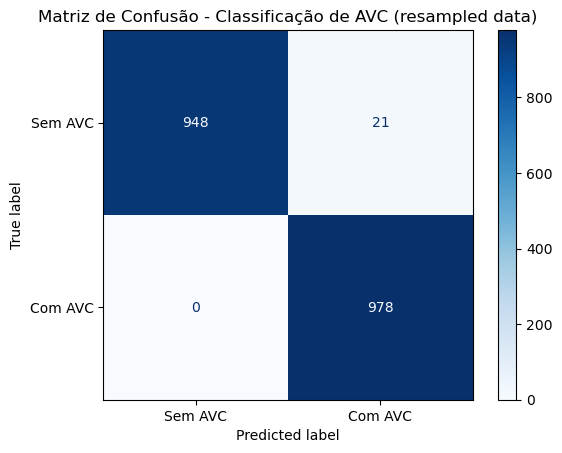

In [63]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sem AVC", "Com AVC"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Classificação de AVC (resampled data)")
plt.show()

<Axes: >

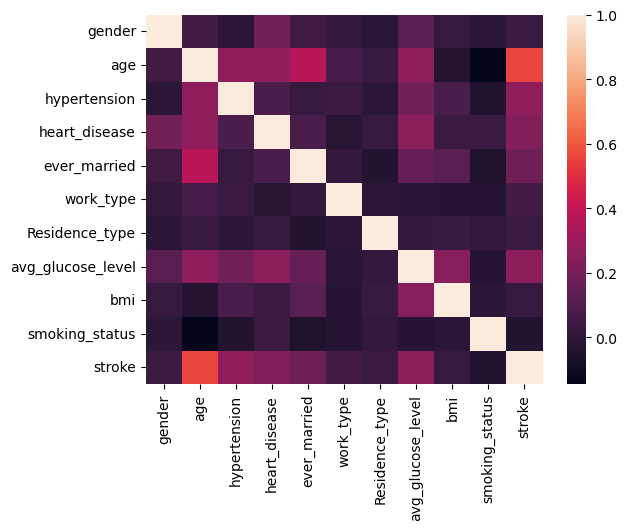

In [64]:
sns.heatmap(df_resampled.corr(),fmt='.2g')

In [65]:
feat_importance = pd.DataFrame({
    'feature': x_train.columns,
    'importance': clf.feature_importances_
})

In [66]:
feat_importance = feat_importance.sort_values(by='importance', ascending=False)
print(feat_importance)

             feature  importance
1                age    0.386300
7  avg_glucose_level    0.218213
8                bmi    0.178923
9     smoking_status    0.044823
2       hypertension    0.042442
5          work_type    0.038753
6     Residence_type    0.026214
3      heart_disease    0.023566
0             gender    0.022598
4       ever_married    0.018166


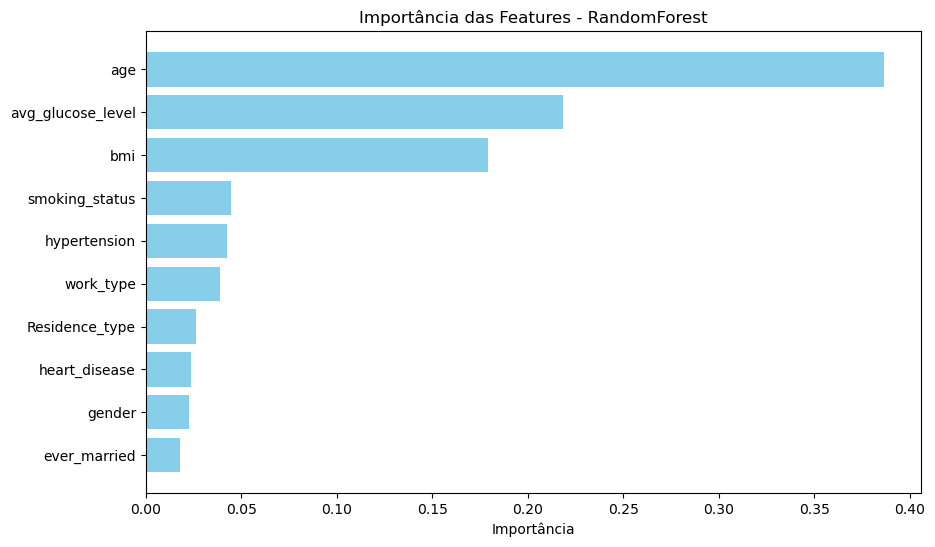

In [67]:
plt.figure(figsize=(10,6))
plt.barh(feat_importance['feature'], feat_importance['importance'], color='skyblue')
plt.xlabel('Importância')
plt.title('Importância das Features - RandomForest')
plt.gca().invert_yaxis() 
plt.show()